In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck


import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
#NASA Exoplanet Archieve of WASP-17b
# https://exoplanetarchive.ipac.caltech.edu/overview/WASP-17b

In [3]:
df = pd.read_csv("WASP_17b_literature.csv")#, header=None)
df = df.set_index('Parameter')
df = df.drop(columns=df.columns[0])


In [4]:
df

,Patel & Espinoza 2022,Ivshina & Winn 2022,Bonomo et al. 2017,Sedaghati et al. 2016,Southworth et al. 2012,Anderson et al. 2011,Anderson et al. 2010,Alderson et al. 2022,TESS: Sector 12 + Sector 38
Parameter,,,,,,,,,
e,---,---,0.020,0,0,0.028+0.015-0.018,0.129+0.106-0.068,---,---
i,---,---,86.83+0.68-0.53,87.06+0.61-0.63,86.71+/-0.30,86.83+0.68-0.56,87.8+2.0-1.0,---,87.54069213161702+0.43098898185745327-0.514004...
P,3.7354300+0.0000071-0.0000074,3.7354826+/-0.0000015,3.7354845+/-0.0000019,3.735438,3.7354845+/-0.0000019,3.7354380+/-0.0000068,3.7354417+0.0000072-0.0000073,3.73548546+/-0.00000027,3.735484831616331+0.0000006232-0.0000016617
R,---,---,1.991+/-0.081,1.747+/-0.078,1.932+/-0.053,1.991+/-0.081,1.74+0.26-0.23,---,---
a,---,---,0.05151+/-0.00035,0.0513+/-0.0029,0.05125+/-0.00103,0.05150+/-0.00034,0.051+0.0017-0.0018,---,---
T_c,2458638.33209+/-0.00026,2457192.70049+/-0.00089,2454592.80154+/-0.00005,2457192.69798+/-0.00028,2454592.80154+/-0.00050,2454577.85806+/-0.00027,2454559.18102+/-0.00028,---,---
b,0.180+0.130-0.100,---,---,0.361+/-0.069,---,0.401+0.059-0.077,---,---,---
RpRs,0.1218+0.0016-0.0014,---,---,0.12345+/-0.00109,0.1255+/-0.0007,---,---,---,0.12130714805888419+0.000404658423926868-0.000...
delta,---,---,---,---,---,1.696+/-0.026,1.672+0.029-0.035,---,---


In [5]:
df_ref_list = df.columns

df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
df_R_list = df.loc['R'] #Planetary radius row
df_a_list = df.loc['a'] #Semi-major axis row
df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
df_T_c_list = df.loc['T_c']
df_transit_duration_list = df.loc['transit_duration']
df_a_Rs_list = df.loc['a/R*']

e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)

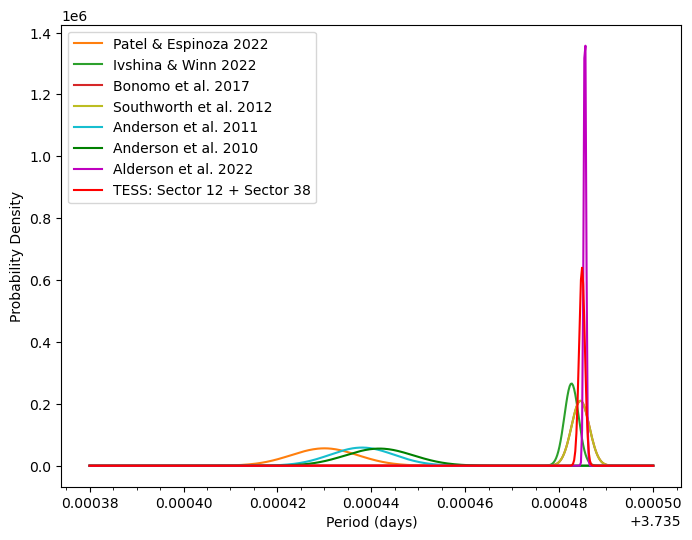

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(3.73538, 3.7355, 500)
for P_obj, author in zip(P_list, P_ref_list):
    mu, upper, lower = P_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.xlabel("Period (days)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

#Same graph seen in https://doi.org/10.1093/mnras/stac661

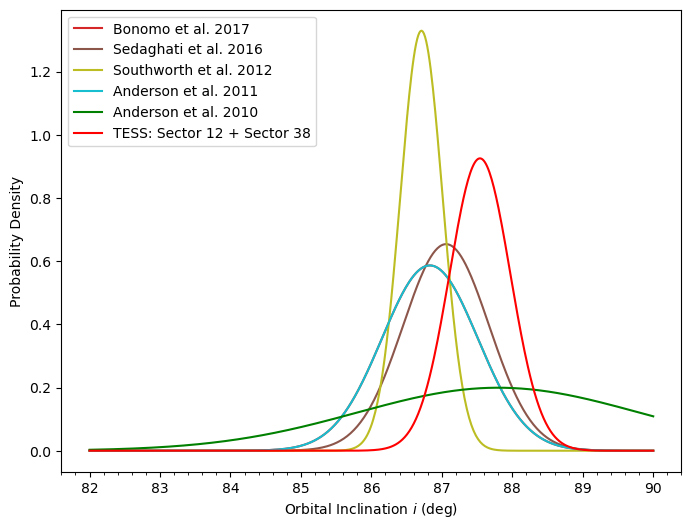

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(82, 90, 500)
for i_obj, author in zip(i_list, i_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Orbital Inclination $i$ (deg)")
plt.ylabel("Probability Density")


ax.legend()
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

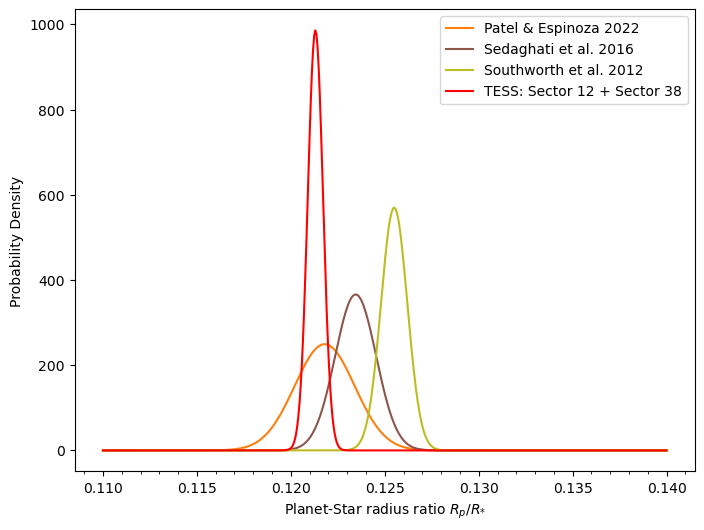

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.11, 0.14, 500)
for RpRs_obj, author in zip(RpRs_list, RpRs_ref_list):
    mu, upper, lower = RpRs_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planet-Star radius ratio $R_{p}/R_{*}$')
plt.ylabel("Probability Density")

ax.legend()
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()

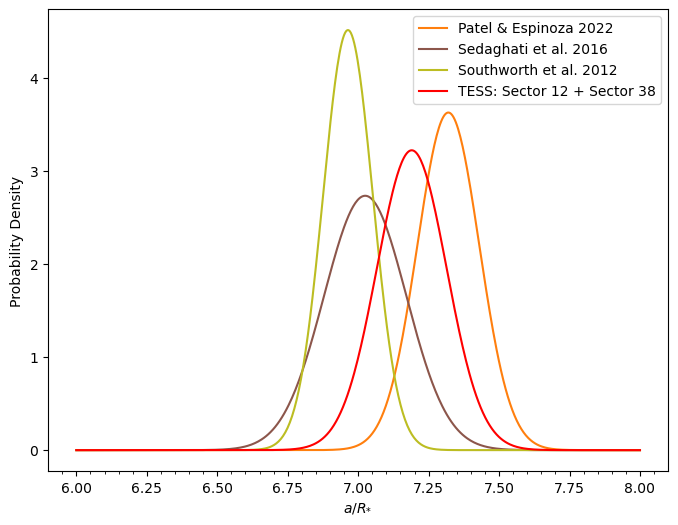

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(6, 8, 500)
for i_obj, author in zip(a_Rs_list, a_Rs_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"$a/R_{*}$")
plt.ylabel("Probability Density")

ax.legend()
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())

plt.show()